In [ ]:
pip install -q lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 42.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 10.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


In [ ]:
import pandas as pd

def read_data():
  data = pd.read_excel('/content/Data_FD_SVM_New.xlsx')
  return data

In [ ]:
data = read_data()
data.head()

,Nama Perusahaan,t,Y,DAR,CR,ukuran,GPM,umur,NPM,Cash_Ratio
0,Akasha Wira International Tbk.,15,0,0.161744,4.343395,14.478505,0.518398,39,0.266354,2.486780
1,Asia Sejahtera Mina Tbk.,1,1,0.370585,2.549401,25.893460,0.014556,16,0.047892,0.266447
2,Buyung Poetra Sembada Tbk.,1,1,0.258839,2.520641,27.513424,0.100156,20,0.032576,0.013144
3,Cahaya Bintang Medan Tbk.,1,1,0.323909,1.432623,26.380763,0.307652,12,0.148310,0.004169
4,Campina Ice Cream Industry Tbk.,15,0,0.128890,8.893372,27.702829,0.584097,51,0.128536,5.882445


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Nama Perusahaan  59 non-null     object 
 1   t                59 non-null     int64  
 2   Y                59 non-null     int64  
 3   DAR              59 non-null     float64
 4   CR               59 non-null     float64
 5   ukuran           59 non-null     float64
 6   GPM              59 non-null     float64
 7   umur             59 non-null     int64  
 8   NPM              59 non-null     float64
 9   Cash_Ratio       59 non-null     float64
dtypes: float64(6), int64(3), object(1)
memory usage: 4.7+ KB


In [ ]:
print(data.columns)

Index(['Nama Perusahaan', 't', 'Y', 'DAR', 'CR', 'ukuran', 'GPM', 'umur',
       'NPM', 'Cash_Ratio'],
      dtype='object')


In [ ]:
data.describe()

,t,Y,DAR,CR,ukuran,GPM,umur,NPM,Cash_Ratio
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,5.949153,0.694915,0.460891,4.668796,24.498821,0.276958,44.559322,0.026539,0.922413
std,6.350193,0.464396,0.271338,15.289194,5.007164,0.237917,23.325486,0.219603,2.657193
min,1.000000,0.000000,0.046479,0.690536,14.478505,-1.009931,9.000000,-1.201667,-0.235349
25%,1.000000,0.000000,0.272738,1.324348,20.998951,0.155316,26.000000,0.003398,0.046011
50%,1.000000,1.000000,0.439411,1.778745,26.665635,0.294932,46.000000,0.039783,0.209058
75%,15.000000,1.000000,0.612209,2.789445,27.932426,0.406981,54.000000,0.101849,0.710632
max,15.000000,1.000000,1.611122,117.305342,30.933567,0.703408,111.000000,0.586032,19.560710


In [ ]:
columns_to_scale = ['DAR', 'CR', 'ukuran', 'GPM', 'umur', 'NPM', 'Cash_Ratio']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

data_new = data.drop(columns=["Nama Perusahaan"])
data_new

,t,Y,DAR,CR,ukuran,GPM,umur,NPM,Cash_Ratio
0,15,0,-1.111952,-0.021466,-2.018374,1.023522,-0.240383,1.101413,0.593783
1,1,1,-0.335672,-0.139810,0.280920,-1.112383,-1.234893,0.098071,-0.248983
2,1,1,-0.751042,-0.141708,0.607226,-0.749506,-1.061934,0.027728,-0.345129
3,1,1,-0.509173,-0.213481,0.379076,0.130119,-1.407851,0.559266,-0.348535
4,15,0,-1.234071,0.278683,0.645378,1.302034,0.278492,0.468449,1.882667
5,1,1,-0.776743,-0.148804,0.499819,0.158153,0.019055,-0.087119,-0.201302
6,15,0,-0.612629,-0.094842,-0.620107,0.987929,0.148773,0.217824,-0.058450
7,15,0,-0.819512,-0.012252,-0.726804,1.807822,0.408211,1.209175,0.627418
8,15,0,-0.882371,-0.113225,-1.752471,-0.270626,-0.672778,0.033693,-0.092320
9,1,1,0.038837,-0.198573,0.227798,-0.379308,-0.888976,0.077674,-0.439449


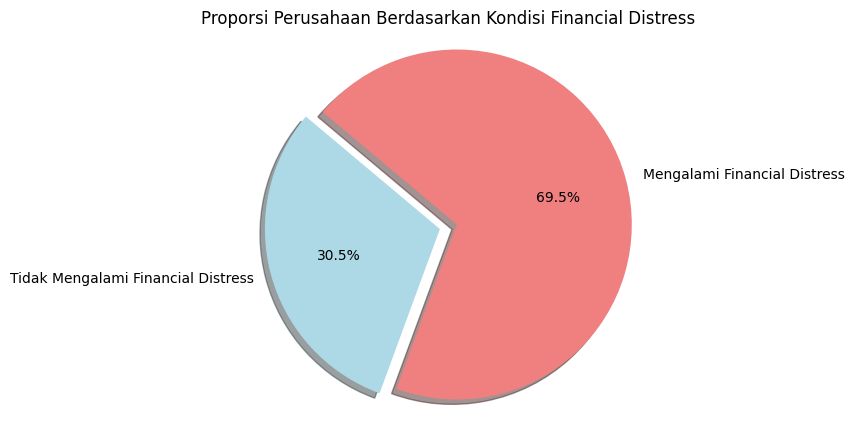

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah perusahaan yang mengalami dan tidak mengalami financial distress
distress_counts = data['Y'].value_counts()

# Siapkan data untuk pie chart
labels = ['Tidak Mengalami Financial Distress', 'Mengalami Financial Distress']
sizes = [distress_counts[0], distress_counts[1]]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # Pemisahan slide untuk 'Not Distressed'

# Buat pie chart
plt.figure(figsize=(7, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.title('Proporsi Perusahaan Berdasarkan Kondisi Financial Distress')
plt.show()

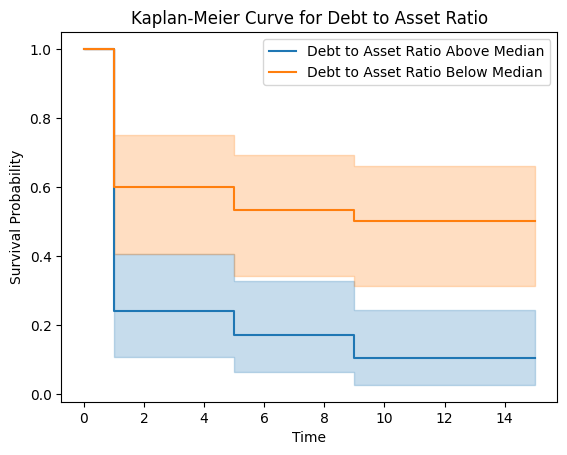

In [ ]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# Inisialisasi KaplanMeierFitter

kmf = KaplanMeierFitter()

# Memisahkan data berdasarkan leverage di atas dan di bawah median
median_DAR = data['DAR'].median()
DAR_above_median = data[data['DAR'] > median_DAR]
DAR_below_median = data[data['DAR'] <= median_DAR]

# Menghitung survival probability untuk kelompok leverage di atas dan di bawah median
kmf.fit(DAR_above_median['t'], event_observed=DAR_above_median['Y'], label='Debt to Asset Ratio Above Median')
ax = kmf.plot()

kmf.fit(DAR_below_median['t'], event_observed=DAR_below_median['Y'], label='Debt to Asset Ratio Below Median')
ax = kmf.plot(ax=ax)

# Menambahkan judul dan label sumbu
plt.title('Kaplan-Meier Curve for Debt to Asset Ratio')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.show()

In [ ]:
# Melakukan uji log-rank
results = logrank_test(DAR_above_median['t'], DAR_below_median['t'], DAR_above_median['Y'], DAR_below_median['Y'])
print(results.print_summary())

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          11.44 <0.005     10.44

None


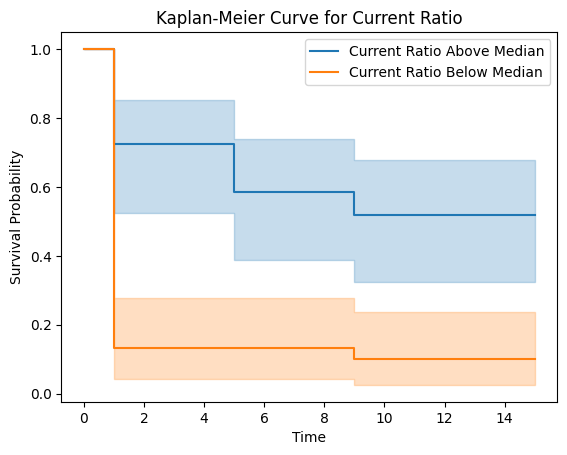

In [ ]:
# Inisialisasi KaplanMeierFitter
kmf = KaplanMeierFitter()

# Memisahkan data berdasarkan profitabilitas di atas dan di bawah median
median_CR = data['CR'].median()
CR_above_median = data[data['CR'] > median_CR]
CR_below_median = data[data['CR'] <= median_CR]

# Menghitung survival probability untuk kelompok profitabilitas di atas dan di bawah median
kmf.fit(CR_above_median['t'], event_observed=CR_above_median['Y'], label='Current Ratio Above Median')
ax = kmf.plot()

kmf.fit(CR_below_median['t'], event_observed=CR_below_median['Y'], label='Current Ratio Below Median')
ax = kmf.plot(ax=ax)

# Menambahkan judul dan label sumbu
plt.title('Kaplan-Meier Curve for Current Ratio')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.show()

In [ ]:
# Melakukan uji log-rank
results = logrank_test(CR_above_median['t'], CR_below_median['t'], CR_above_median['Y'], CR_below_median['Y'])
print(results.print_summary())

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          15.88 <0.005     13.86

None


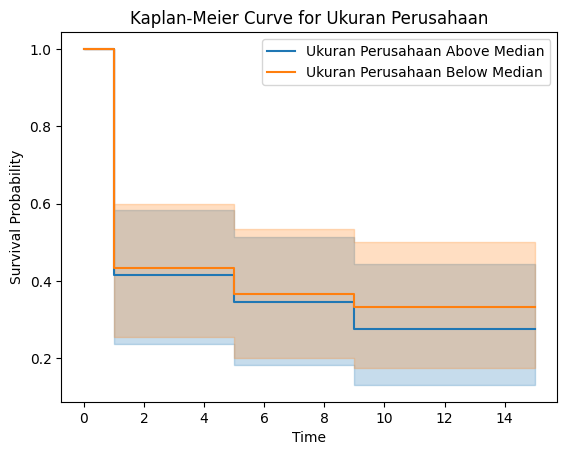

In [ ]:
# Inisialisasi KaplanMeierFitter
kmf = KaplanMeierFitter()

# Memisahkan data berdasarkan likuiditas di atas dan di bawah median
median_ukuran = data['ukuran'].median()
ukuran_above_median = data[data['ukuran'] > median_ukuran]
ukuran_below_median = data[data['ukuran'] <= median_ukuran]

# Menghitung survival probability untuk kelompok likuiditas di atas dan di bawah median
kmf.fit(ukuran_above_median['t'], event_observed=ukuran_above_median['Y'], label='Ukuran Perusahaan Above Median')
ax = kmf.plot()

kmf.fit(ukuran_below_median['t'], event_observed=ukuran_below_median['Y'], label='Ukuran Perusahaan Below Median')
ax = kmf.plot(ax=ax)

# Menambahkan judul dan label sumbu
plt.title('Kaplan-Meier Curve for Ukuran Perusahaan')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.show()

In [ ]:
# Melakukan uji log-rank
results = logrank_test(ukuran_above_median['t'], ukuran_below_median['t'], ukuran_above_median['Y'], ukuran_below_median['Y'])
print(results.print_summary())

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.17 0.68      0.56

None


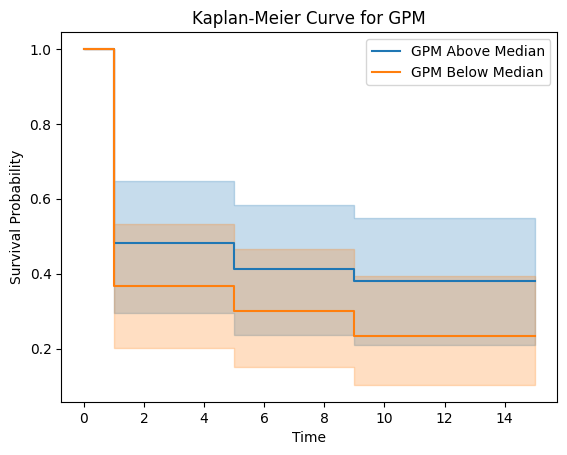

In [ ]:
# Inisialisasi KaplanMeierFitter
kmf = KaplanMeierFitter()

# Memisahkan data berdasarkan salesgrowth di atas dan di bawah median
median_GPM = data['GPM'].median()
GPM_above_median = data[data['GPM'] > median_GPM]
GPM_below_median = data[data['GPM'] <= median_GPM]

# Menghitung survival probability untuk kelompok salesgrowth di atas dan di bawah median
kmf.fit(GPM_above_median['t'], event_observed=GPM_above_median['Y'], label='GPM Above Median')
ax = kmf.plot()

kmf.fit(GPM_below_median['t'], event_observed=GPM_below_median['Y'], label='GPM Below Median')
ax = kmf.plot(ax=ax)

# Menambahkan judul dan label sumbu
plt.title('Kaplan-Meier Curve for GPM')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.show()

In [ ]:
# Melakukan uji log-rank
results = logrank_test(GPM_above_median['t'], GPM_below_median['t'], GPM_above_median['Y'], GPM_below_median['Y'])
print(results.print_summary())

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.37 0.24      2.05

None


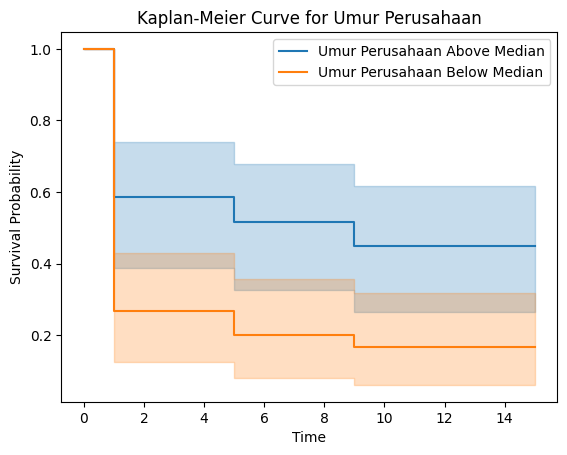

In [ ]:
# Inisialisasi KaplanMeierFitter
kmf = KaplanMeierFitter()

# Memisahkan data berdasarkan ukuran di atas dan di bawah median
median_umur = data['umur'].median()
umur_above_median = data[data['umur'] > median_umur]
umur_below_median = data[data['umur'] <= median_umur]

# Menghitung survival probability untuk kelompok ukuran di atas dan di bawah median
kmf.fit(umur_above_median['t'], event_observed=umur_above_median['Y'], label='Umur Perusahaan Above Median')
ax = kmf.plot()

kmf.fit(umur_below_median['t'], event_observed=umur_below_median['Y'], label='Umur Perusahaan Below Median')
ax = kmf.plot(ax=ax)

# Menambahkan judul dan label sumbu
plt.title('Kaplan-Meier Curve for Umur Perusahaan')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.show()

In [ ]:
# Melakukan uji log-rank
results = logrank_test(umur_above_median['t'], umur_below_median['t'], umur_above_median['Y'], umur_below_median['Y'])
print(results.print_summary())

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           6.25 0.01      6.33

None


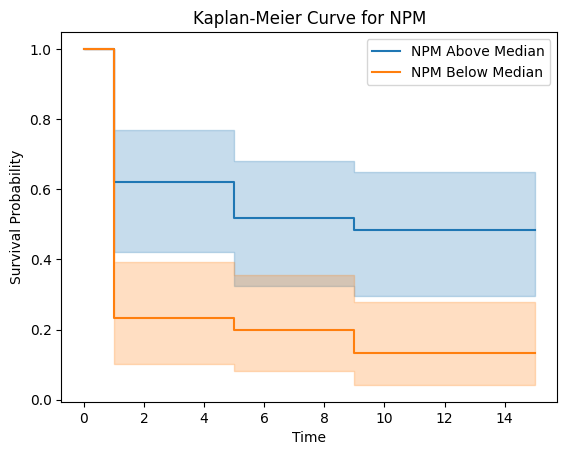

In [ ]:

# Inisialisasi KaplanMeierFitter
kmf = KaplanMeierFitter()

# Memisahkan data berdasarkan gpm di atas dan di bawah median
median_NPM = data['NPM'].median()
NPM_above_median = data[data['NPM'] > median_NPM]
NPM_below_median = data[data['NPM'] <= median_NPM]

# Menghitung survival probability untuk kelompok gpm di atas dan di bawah median
kmf.fit(NPM_above_median['t'], event_observed=NPM_above_median['Y'], label='NPM Above Median')
ax = kmf.plot()

kmf.fit(NPM_below_median['t'], event_observed=NPM_below_median['Y'], label='NPM Below Median')
ax = kmf.plot(ax=ax)

# Menambahkan judul dan label sumbu
plt.title('Kaplan-Meier Curve for NPM')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.show()

In [ ]:
# Melakukan uji log-rank
results = logrank_test(NPM_above_median['t'], NPM_below_median['t'], NPM_above_median['Y'], NPM_below_median['Y'])
print(results.print_summary())

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
           9.22 <0.005      8.71

None


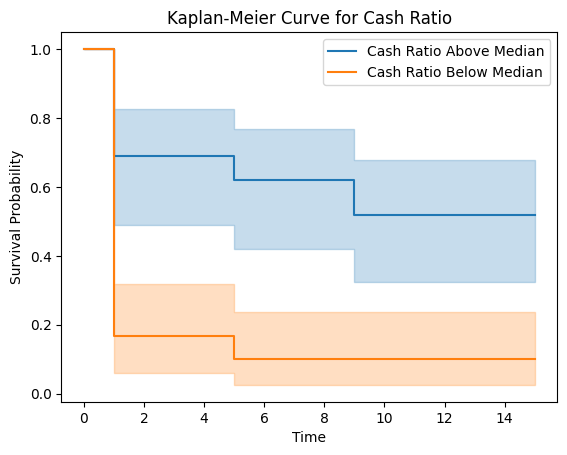

In [ ]:
# Inisialisasi KaplanMeierFitter
kmf = KaplanMeierFitter()

# Memisahkan data berdasarkan umur di atas dan di bawah median
median_cash = data['Cash_Ratio'].median()
cash_above_median = data[data['Cash_Ratio'] > median_cash]
cash_below_median = data[data['Cash_Ratio'] <= median_cash]

# Menghitung survival probability untuk kelompok umur di atas dan di bawah median
kmf.fit(cash_above_median['t'], event_observed=cash_above_median['Y'], label='Cash Ratio Above Median')
ax = kmf.plot()

kmf.fit(cash_below_median['t'], event_observed=cash_below_median['Y'], label='Cash Ratio Below Median')
ax = kmf.plot(ax=ax)

# Menambahkan judul dan label sumbu
plt.title('Kaplan-Meier Curve for Cash Ratio')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.show()

In [ ]:
# Melakukan uji log-rank
results = logrank_test(cash_above_median['t'], cash_below_median['t'], cash_above_median['Y'], cash_below_median['Y'])
print(results.print_summary())

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          15.81 <0.005     13.80

None


In [ ]:
data_KM = pd.read_excel('/content/Hasil Pengelompokan.xlsx', sheet_name="Sheet 1")

In [ ]:
# Inisialisasi KaplanMeierFitter
kmf = KaplanMeierFitter()

# Memisahkan data berdasarkan umur di atas dan di bawah median
median_rank = data_KM['Rank'].median()
rank_above_median = data_KM[data_KM['Rank'] > median_rank]
rank_below_median = data_KM[data_KM['Rank'] <= median_rank]

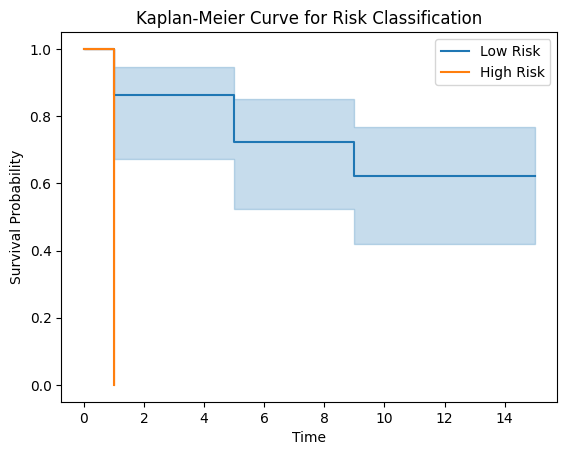

In [ ]:
# Menghitung survival probability untuk kelompok umur di atas dan di bawah median
kmf.fit(rank_above_median['T'], event_observed=rank_above_median['Y'], label='Low Risk')
ax = kmf.plot()

kmf.fit(rank_below_median['T'], event_observed=rank_below_median['Y'], label='High Risk')
ax = kmf.plot(ax=ax)

# Menambahkan judul dan label sumbu
plt.title('Kaplan-Meier Curve for Risk Classification')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.show()

In [ ]:
# Melakukan uji log-rank
results = logrank_test(rank_above_median['T'], rank_below_median['T'], rank_above_median['Y'], rank_below_median['Y'])
print(results.print_summary())

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          44.12 <0.005     34.91

None


 Nilai p sebesar 0,04 menunjukkan bahwa terdapat bukti yang cukup untuk menolak hipotesis nol pada tingkat signifikansi 0,05. Artinya, terdapat perbedaan yang signifikan antara distribusi waktu kejadian antar kelompok.

Uji Asumsi Proportional Hazard

In [ ]:
from lifelines import CoxPHFitter
from lifelines.statistics import proportional_hazard_test

# Membuat model Cox Proportional Hazard
cph = CoxPHFitter()

# Melakukan fitting model ke data
cph.fit(data, duration_col='t', event_col='Y', formula='DAR + CR + umur + ukuran + GPM + NPM + Cash_Ratio')

# Melakukan uji asumsi proporsionalitas hazard menggunakan uji residual Schoenfeld
test_results = proportional_hazard_test(cph, data, time_transform='rank', kind='schoenfeld')
print(test_results)

<lifelines.StatisticalResult: proportional_hazard_test>
    time_transform = rank
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 59 total observations, 18 right-censored observations>
              kind = schoenfeld
         test_name = proportional_hazard_test

---
            test_statistic    p  -log2(p)
CR                    0.30 0.58      0.78
Cash_Ratio            0.05 0.82      0.28
DAR                   0.61 0.44      1.20
GPM                   0.02 0.87      0.19
NPM                   0.05 0.83      0.27
ukuran                0.26 0.61      0.72
umur                  0.00 0.97      0.05


In [ ]:
global_test = cph.check_assumptions(data, p_value_threshold=0.1)
print("Global Test Results:")
print(global_test)

Proportional hazard assumption looks okay.
Global Test Results:
[]




Pada contoh output yang diberikan, variabel-variabel seperti gpm, leverage, likuiditas, profitabilitas, ukuran, dan umur semuanya memiliki nilai p yang cukup tinggi (lebih besar dari 0.05), yang menunjukkan bahwa tidak ada cukup bukti untuk menolak asumsi bahwa hazard proporsionalitas konstan sepanjang waktu untuk variabel-variabel tersebut.

Hal ini menunjukkan bahwa asumsi proporsionalitas hazard terpenuhi untuk semua variabel dalam analisis.

Pembentukan Model Awal Regresi

In [ ]:
# Menampilkan ringkasan model
print(cph.print_summary())
c_index = cph.concordance_index_
print("Concordance Index (C-index):", c_index)

<lifelines.CoxPHFitter: fitted with 59 total observations, 18 right-censored observations>
             duration col = 't'
                event col = 'Y'
      baseline estimation = breslow
   number of observations = 59
number of events observed = 41
   partial log-likelihood = -139.52
         time fit was run = 2024-06-26 06:22:15 UTC

---
             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                          
DAR          0.24       1.27       0.13            -0.02             0.50                 0.98                 1.65
CR          -0.32       0.73       0.27            -0.85             0.21                 0.43                 1.23
umur        -0.36       0.70       0.21            -0.76             0.04                 0.47                 1.04
ukuran      -0.06       0.94       0.17            -0.39             0.27                 0.67                 1.31
GPM         -0.21       0.81       0.28            -0.77             0.34                 0.47                 1.41
NPM         -0.39       0.68       0.25            -0.89             0.11                 0.41                 1.11
Cash_Ratio   0.05       1.05       0.26            -0.46             0.56                 0.63                 1.76

             cmp to     z    p   -log2(p)
covariate                                
DAR            0.00  1.78 0.07       3.75
CR             0.00 -1.19 0.23       2.09
umur           0.00 -1.75 0.08       3.65
ukuran         0.00 -0.37 0.72       0.48
GPM            0.00 -0.75 0.45       1.14
NPM            0.00 -1.54 0.12       3.03
Cash_Ratio     0.00  0.20 0.84       0.25
---
Concordance = 0.80
Partial AIC = 293.04
log-likelihood ratio test = 17.23 on 7 df
-log2(p) of ll-ratio test = 5.97

None
Concordance Index (C-index): 0.8006072874493927


In [ ]:
summary = cph.summary
alpha = 0.10
z = 1.645  # Z-score untuk interval kepercayaan 90%

# Menghitung batas bawah dan atas untuk interval kepercayaan 90%
summary['coef lower 90%'] = summary['coef'] - z * summary['se(coef)']
summary['coef upper 90%'] = summary['coef'] + z * summary['se(coef)']
summary['exp(coef) lower 90%'] = summary['exp(coef) lower 95%'] ** (1 - 2 * alpha / 2)
summary['exp(coef) upper 90%'] = summary['exp(coef) upper 95%'] ** (1 + 2 * alpha / 2)

# Menampilkan ringkasan yang diperbarui
print(summary)

# Menghitung dan menampilkan Concordance Index (C-index)
c_index = cph.concordance_index_
print("Concordance Index (C-index):", c_index)

                coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                   
DAR         0.237485   1.268056  0.133081       -0.023348        0.498319   
CR         -0.320022   0.726133  0.269058       -0.847367        0.207323   
umur       -0.359854   0.697778  0.205404       -0.762438        0.042729   
ukuran     -0.061812   0.940060  0.169313       -0.393659        0.270036   
GPM        -0.212072   0.808906  0.282313       -0.765396        0.341252   
NPM        -0.390121   0.676975  0.252654       -0.885314        0.105072   
Cash_Ratio  0.052188   1.053574  0.260849       -0.459067        0.563443   

            exp(coef) lower 95%  exp(coef) upper 95%  cmp to         z  \
covariate                                                                
DAR                    0.976922             1.645952     0.0  1.784519   
CR                     0.428542             1.230379     0.0 -1.189415   
umur      

Koefisien (coef):

Koefisien menunjukkan arah dan besar perubahan log-hazard rate (log-hasil rasio hazard) untuk setiap satuan perubahan dalam variabel independen.
Nilai negatif menunjukkan bahwa semakin tinggi nilai variabel independen, semakin rendah risiko terjadinya kejadian (distress), dan sebaliknya untuk nilai positif.

Koefisien ini diperkirakan menggunakan metode Maksimum Likelihood Estimation (MLE).

Uji Serentak

In [ ]:
# Uji signifikansi terhadap keseluruhan model dengan uji likelihood ratio
likelihood_ratio_test = cph.log_likelihood_ratio_test()
print("Hasil uji signifikansi menggunakan likelihood ratio test:")
print(likelihood_ratio_test)

Hasil uji signifikansi menggunakan likelihood ratio test:
<lifelines.StatisticalResult: log-likelihood ratio test>
null_distribution = chi squared
  degrees_freedom = 7
        test_name = log-likelihood ratio test

---
 test_statistic    p  -log2(p)
          17.23 0.02      5.97


Hasil uji signifikansi menggunakan likelihood ratio test menunjukkan bahwa terdapat bukti yang sangat kuat (p-value < 0.005) untuk menolak hipotesis nol bahwa tidak ada efek signifikan dari setidaknya satu variabel dalam model Cox Proportional Hazards.

Dengan nilai test_statistic sebesar 76.50 dan p-value yang sangat kecil, kita memiliki keyakinan yang tinggi bahwa setidaknya satu variabel dalam model memiliki pengaruh yang signifikan terhadap risiko kejadian yang diamati.

Uji Parsial

In [ ]:
# Menampilkan hasil uji signifikansi terhadap masing-masing koefisien
print("Hasil uji signifikansi terhadap masing-masing koefisien (uji Wald):")
print(cph.summary)

Hasil uji signifikansi terhadap masing-masing koefisien (uji Wald):
                coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                   
DAR         0.237485   1.268056  0.133081       -0.023348        0.498319   
CR         -0.320022   0.726133  0.269058       -0.847367        0.207323   
umur       -0.359854   0.697778  0.205404       -0.762438        0.042729   
ukuran     -0.061812   0.940060  0.169313       -0.393659        0.270036   
GPM        -0.212072   0.808906  0.282313       -0.765396        0.341252   
NPM        -0.390121   0.676975  0.252654       -0.885314        0.105072   
Cash_Ratio  0.052188   1.053574  0.260849       -0.459067        0.563443   

            exp(coef) lower 95%  exp(coef) upper 95%  cmp to         z  \
covariate                                                                
DAR                    0.976922             1.645952     0.0  1.784519   
CR              

Nilai p yang rendah (< 0.05) menunjukkan bahwa variabel tersebut memiliki pengaruh yang signifikan terhadap risiko kejadian. (variabel "likuiditas" dan "salesgrowth" memiliki nilai p yang rendah (<0.05), sehingga dapat disimpulkan bahwa variabel-variabel ini memiliki pengaruh yang signifikan terhadap risiko kejadian. Sedangkan variabel lainnya tidak memiliki pengaruh yang signifikan.)

Koefisien positif menunjukkan bahwa risiko kejadian meningkat dengan meningkatnya nilai variabel, sedangkan koefisien negatif menunjukkan bahwa risiko kejadian menurun dengan meningkatnya nilai variabel.

Backward Elimination

In [ ]:
# Inisialisasi model
cph = CoxPHFitter()

# Fit model awal
print("Fit model awal:")
cph.fit(data_new, duration_col='t', event_col='Y', formula='DAR + CR + ukuran + GPM + umur + NPM + Cash_Ratio')
print(cph.summary)
print()

# Lakukan backward selection
p_values = cph.summary['p']  # Ambil nilai p untuk setiap variabel
max_p_value = p_values.idxmax()  # Ambil variabel dengan p-value tertinggi
iteration = 1

while p_values[max_p_value] > 0.1:  # Ulangi selama variabel dengan p-value tertinggi > 0.1
    print(f"Iteration {iteration}:")
    print(f"Variabel dengan p-value tertinggi: {max_p_value}, p-value: {p_values[max_p_value]}")
    data_new = data_new.drop(columns=[max_p_value])  # Hapus variabel dengan p-value tertinggi
    cph.fit(data_new, duration_col='t', event_col='Y')
    print()
    p_values = cph.summary['p']  # Perbarui nilai p untuk setiap variabel
    print(cph.summary)
    print(cph.print_summary())
    max_p_value = p_values.idxmax()  # Ambil variabel dengan p-value tertinggi
    iteration += 1

# Tampilkan hasil akhir
print("Variabel yang dipilih setelah backward selection:")
print(data.columns)
print("\nSummary model:")
print(cph.summary)

Fit model awal:
                coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                   
DAR         0.237485   1.268056  0.133081       -0.023348        0.498319   
CR         -0.320022   0.726133  0.269058       -0.847367        0.207323   
ukuran     -0.061812   0.940060  0.169313       -0.393659        0.270036   
GPM        -0.212072   0.808906  0.282313       -0.765396        0.341252   
umur       -0.359854   0.697778  0.205404       -0.762438        0.042729   
NPM        -0.390121   0.676975  0.252654       -0.885314        0.105072   
Cash_Ratio  0.052188   1.053574  0.260849       -0.459067        0.563443   

            exp(coef) lower 95%  exp(coef) upper 95%  cmp to         z  \
covariate                                                                
DAR                    0.976922             1.645952     0.0  1.784519   
CR                     0.428542             1.230379     0.0 -1.1894

<lifelines.CoxPHFitter: fitted with 59 total observations, 18 right-censored observations>
             duration col = 't'
                event col = 'Y'
      baseline estimation = breslow
   number of observations = 59
number of events observed = 41
   partial log-likelihood = -139.54
         time fit was run = 2024-06-26 06:23:24 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
DAR         0.23       1.26       0.13            -0.02             0.49                 0.98                 1.64
CR         -0.30       0.74       0.24            -0.77             0.18                 0.46                 1.19
ukuran     -0.06       0.94       0.17            -0.39             0.27                 0.68                 1.31
GPM        -0.19       0.83       0.26            -0.70             0.32                 0.50                 1.37
umur       -0.37       0.69       0.20            -0.77             0.03                 0.47                 1.04
NPM        -0.39       0.68       0.25            -0.88             0.11                 0.41                 1.11

            cmp to     z    p   -log2(p)
covariate                               
DAR           0.00  1.77 0.08       3.71
CR            0.00 -1.23 0.22       2.19
ukuran        0.00 -0.36 0.72       0.47
GPM           0.00 -0.74 0.46       1.11
umur          0.00 -1.79 0.07       3.77
NPM           0.00 -1.53 0.13       3.00
---
Concordance = 0.80
Partial AIC = 291.08
log-likelihood ratio test = 17.20 on 6 df
-log2(p) of ll-ratio test = 6.86

None
Iteration 2:
Variabel dengan p-value tertinggi: ukuran, p-value: 0.7219771546232261

               coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                  
DAR        0.236811   1.267201  0.132924       -0.023715        0.497336   
CR        -0.283864   0.752869  0.240062       -0.754376        0.186649   
GPM       -0.189813   0.827114  0.258038       -0.695557        0.315932   
umur      -0.344490   0.708582  0.195797       -0.728245        0.039265   
NPM       -0.368603   0.691700  0.246320       -0.851382        0.114176   

           exp(coef) lower 95%  exp(coef) upper 95%  cmp to         z  \
covariate                                                               
DAR                   0.976564             1.644336     0.0  1.781555   
CR                    0.470304             1.205205     0.0 -1.182459   
GPM                   0.498796             1.371537     0.0 -0.735600   
umur        

<lifelines.CoxPHFitter: fitted with 59 total observations, 18 right-censored observations>
             duration col = 't'
                event col = 'Y'
      baseline estimation = breslow
   number of observations = 59
number of events observed = 41
   partial log-likelihood = -139.60
         time fit was run = 2024-06-26 06:23:24 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
DAR         0.24       1.27       0.13            -0.02             0.50                 0.98                 1.64
CR         -0.28       0.75       0.24            -0.75             0.19                 0.47                 1.21
GPM        -0.19       0.83       0.26            -0.70             0.32                 0.50                 1.37
umur       -0.34       0.71       0.20            -0.73             0.04                 0.48                 1.04
NPM        -0.37       0.69       0.25            -0.85             0.11                 0.43                 1.12

            cmp to     z    p   -log2(p)
covariate                               
DAR           0.00  1.78 0.07       3.74
CR            0.00 -1.18 0.24       2.08
GPM           0.00 -0.74 0.46       1.11
umur          0.00 -1.76 0.08       3.67
NPM           0.00 -1.50 0.13       2.89
---
Concordance = 0.80
Partial AIC = 289.21
log-likelihood ratio test = 17.07 on 5 df
-log2(p) of ll-ratio test = 7.84

None
Iteration 3:
Variabel dengan p-value tertinggi: GPM, p-value: 0.461973992331284

               coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                  
DAR        0.240101   1.271378  0.132456       -0.019508        0.499711   
CR        -0.213427   0.807811  0.220454       -0.645509        0.218655   
umur      -0.372149   0.689251  0.195929       -0.756162        0.011864   
NPM       -0.451166   0.636885  0.222308       -0.886881       -0.015450   

           exp(coef) lower 95%  exp(coef) upper 95%  cmp to         z  \
covariate                                                               
DAR                   0.980681             1.648245     0.0  1.812683   
CR                    0.524396             1.244402     0.0 -0.968125   
umur                  0.469465             1.011934     0.0 -1.899413   
NPM                   0.411938             0.984668     0.0 -2.029463   

                  

<lifelines.CoxPHFitter: fitted with 59 total observations, 18 right-censored observations>
             duration col = 't'
                event col = 'Y'
      baseline estimation = breslow
   number of observations = 59
number of events observed = 41
   partial log-likelihood = -139.88
         time fit was run = 2024-06-26 06:23:24 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
DAR         0.24       1.27       0.13            -0.02             0.50                 0.98                 1.65
CR         -0.21       0.81       0.22            -0.65             0.22                 0.52                 1.24
umur       -0.37       0.69       0.20            -0.76             0.01                 0.47                 1.01
NPM        -0.45       0.64       0.22            -0.89            -0.02                 0.41                 0.98

            cmp to     z    p   -log2(p)
covariate                               
DAR           0.00  1.81 0.07       3.84
CR            0.00 -0.97 0.33       1.59
umur          0.00 -1.90 0.06       4.12
NPM           0.00 -2.03 0.04       4.56
---
Concordance = 0.79
Partial AIC = 287.75
log-likelihood ratio test = 16.53 on 4 df
-log2(p) of ll-ratio test = 8.71

None
Iteration 4:
Variabel dengan p-value tertinggi: CR, p-value: 0.3329819178511118

               coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                  
DAR        0.288985   1.335072  0.117403        0.058880        0.519090   
umur      -0.385422   0.680163  0.196400       -0.770360       -0.000485   
NPM       -0.271388   0.762321  0.132996       -0.532056       -0.010720   

           exp(coef) lower 95%  exp(coef) upper 95%  cmp to         z  \
covariate                                                               
DAR                   1.060648             1.680498     0.0  2.461483   
umur                  0.462847             0.999515     0.0 -1.962432   
NPM                   0.587396             0.989338     0.0 -2.040566   

                  p  -log2(p)  
covariate                      
DAR        0.013836  6.175389  
umur       0.049712  4.330257  
NPM        0.041294  4.597924  


<lifelines.CoxPHFitter: fitted with 59 total observations, 18 right-censored observations>
             duration col = 't'
                event col = 'Y'
      baseline estimation = breslow
   number of observations = 59
number of events observed = 41
   partial log-likelihood = -140.36
         time fit was run = 2024-06-26 06:23:24 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
DAR         0.29       1.34       0.12             0.06             0.52                 1.06                 1.68
umur       -0.39       0.68       0.20            -0.77            -0.00                 0.46                 1.00
NPM        -0.27       0.76       0.13            -0.53            -0.01                 0.59                 0.99

            cmp to     z    p   -log2(p)
covariate                               
DAR           0.00  2.46 0.01       6.18
umur          0.00 -1.96 0.05       4.33
NPM           0.00 -2.04 0.04       4.60
---
Concordance = 0.78
Partial AIC = 286.72
log-likelihood ratio test = 15.56 on 3 df
-log2(p) of ll-ratio test = 9.48

None
Variabel yang dipilih setelah backward selection:
Index(['Nama Perusahaan', 't', 'Y', 'DAR', 'CR', 'ukuran', 'GPM', 'umur',
       'NPM', 'Cash_Ratio'],
      dtype='object')

Summary model:
               coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                  
DAR        0.288985   1.335072  0.117403        0.058880        0.519090   
umur      -0.385422   0.680163  0.196400       -0.770360       -0.000485   
NPM       -0.271388   0.762321  0.132996       -0.532056       -0.010720   

           exp(coef) lower 95%  exp(coef) upper 95%  cmp to         z  \
covariate                                                               
DAR                   1.060648             1.680498     0.0  2.461483   
umur                  0.462847             0.999515     0.0 -1.962432   
NPM                   0.587396             0.989338     0.0 -2.040566   

                  p  -log2(p)  
covariate                

In [ ]:
print(cph.print_summary())
c_index = cph.concordance_index_
print("Concordance Index (C-index):", c_index)

<lifelines.CoxPHFitter: fitted with 59 total observations, 18 right-censored observations>
             duration col = 't'
                event col = 'Y'
      baseline estimation = breslow
   number of observations = 59
number of events observed = 41
   partial log-likelihood = -140.36
         time fit was run = 2024-06-26 06:23:24 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
DAR         0.29       1.34       0.12             0.06             0.52                 1.06                 1.68
umur       -0.39       0.68       0.20            -0.77            -0.00                 0.46                 1.00
NPM        -0.27       0.76       0.13            -0.53            -0.01                 0.59                 0.99

            cmp to     z    p   -log2(p)
covariate                               
DAR           0.00  2.46 0.01       6.18
umur          0.00 -1.96 0.05       4.33
NPM           0.00 -2.04 0.04       4.60
---
Concordance = 0.78
Partial AIC = 286.72
log-likelihood ratio test = 15.56 on 3 df
-log2(p) of ll-ratio test = 9.48

None
Concordance Index (C-index): 0.7844129554655871


Uji parsial dan serentak model terbaik

In [ ]:
# Uji signifikansi terhadap keseluruhan model dengan uji likelihood ratio
likelihood_ratio_test = cph.log_likelihood_ratio_test()
print("Hasil uji signifikansi menggunakan likelihood ratio test:")
print(likelihood_ratio_test)

Hasil uji signifikansi menggunakan likelihood ratio test:
<lifelines.StatisticalResult: log-likelihood ratio test>
null_distribution = chi squared
  degrees_freedom = 3
        test_name = log-likelihood ratio test

---
 test_statistic      p  -log2(p)
          15.56 <0.005      9.48


In [ ]:
# Menampilkan hasil uji signifikansi terhadap masing-masing koefisien
print("Hasil uji signifikansi terhadap masing-masing koefisien (uji Wald):")
print(cph.summary)

Hasil uji signifikansi terhadap masing-masing koefisien (uji Wald):
               coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                  
DAR        0.288985   1.335072  0.117403        0.058880        0.519090   
umur      -0.385422   0.680163  0.196400       -0.770360       -0.000485   
NPM       -0.271388   0.762321  0.132996       -0.532056       -0.010720   

           exp(coef) lower 95%  exp(coef) upper 95%  cmp to         z  \
covariate                                                               
DAR                   1.060648             1.680498     0.0  2.461483   
umur                  0.462847             0.999515     0.0 -1.962432   
NPM                   0.587396             0.989338     0.0 -2.040566   

                  p  -log2(p)  
covariate                      
DAR        0.013836  6.175389  
umur       0.049712  4.330257  
NPM        0.041294  4.597924  


Hazard Ratio

In [ ]:
p_value = cph._compute_p_values()
hazard_ratios = cph.hazard_ratios_.tolist()
print('p_value', p_value)
print('hazard_ratios', hazard_ratios)

p_value [0.01383638 0.04971216 0.041294  ]
hazard_ratios [1.3350715061826461, 0.6801634373273078, 0.7623208808905119]


In [ ]:
# import numpy as np

# # Koefisien untuk fitur likuiditas dan salesgrowth setelah backward elimination
# DAR = 0.288985
# umur = -0.385422
# NPM = -0.271388

# # Menghitung hazard ratio
# DAR_hr = np.exp(DAR)
# umur_hr = np.exp(umur)
# NPM_hr = np.exp(NPM)

# print("Hazard Ratio DAR:", DAR_hr)
# print("Hazard Ratio Umur Perusahaan:", umur_hr)
# print("Hazard Ratio NPM:", NPM_hr)

Hazard Ratio DAR: 1.3350717023027776
Hazard Ratio Umur Perusahaan: 0.680163546616273
Hazard Ratio NPM: 0.7623206586007056
